In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tf_explain.core.grad_cam import GradCAM
from keras.applications.vgg16 import preprocess_input, decode_predictions

# Load pretrained model or your own
model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=True)

# Load a sample image (or multiple ones)
img = tf.keras.preprocessing.image.load_img("cat.1504.jpg", target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
data = ([np.copy(img)], None)

In [40]:
def inference(x):
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    c = model.predict(x)
    c = np.argmax(c[0])
    print(c)
    return decode_predictions(preds, top=1)[0][0][1]

In [41]:
inference(img)

281


'tabby'

In [42]:

# Start explainer
explainer = GradCAM()
grid = explainer.explain(data, model, class_index=281) 

#explainer.save(grid, ".", "grad_cam.png")

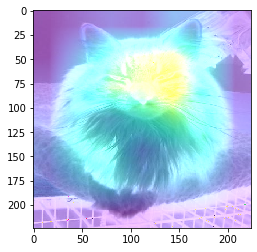

In [43]:
plt.imshow(grid)